In [2]:
import wget
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import TwoSlopeNorm
import numpy as np

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Latin Modern Roman"
})
%config InlineBackend.figure_format='retina'

## Q2: Planetary positions

The distances of the planets from the Sun (technically, their semi-major axes) are:

In [16]:
a = np.array([0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.22, 30.06, 39.48])

These are in units where the Earth-Sun distance is 1 (astronomical units).

The corresponding periods of their orbits (how long they take to go once around the Sun) are, in years

In [17]:
P = np.array([0.24, 0.62, 1.00, 1.88, 11.86, 29.46, 84.01, 164.8, 248.09])

Finally, the names of the planets corresponding to these are:

In [18]:
names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", 
         "Uranus", "Neptune", "Pluto"]

(technically, pluto isn't a planet anymore, but we still love it :)

  * Plot as points, the periods vs. distances for each planet on a log-log plot.

  * Write the name of the planet next to the point for that planet on the plot

(0.30959859432226583, 57.441365452352855)

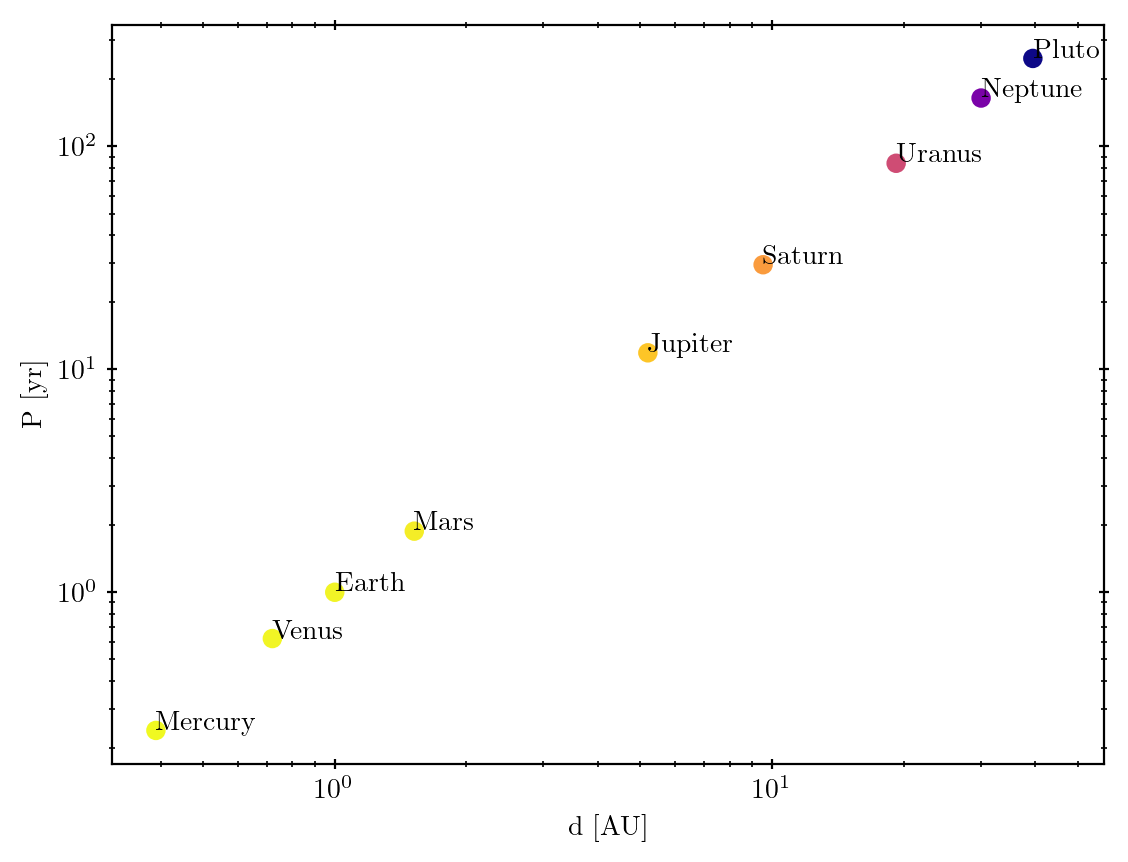

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(a, P, c=a, cmap='plasma_r')
for i,label in enumerate(names):
    ax.annotate(label, xy=(a[i], P[i]))
ax.set_xlabel(r'd [AU]')
ax.set_ylabel('P [yr]')
ax.semilogx()
ax.semilogy()
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1]*1.1)
ax.tick_params(axis='both', which='both', top=True, right=True, direction='inout')
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1]*1.05)

## Q3: A perfect circle

For an angle $\theta$ in the range $\theta \in [0, 2\pi]$, the polar equations of a circle of radius $R$ are:

$$x = R\cos(\theta)$$

$$y = R\sin(\theta)$$

We want to draw a circle.   

  * Create an array to hold the theta values&mdash;the more we use, the smoother the circle will be
  * Create `x` and `y` arrays from `theta` for your choice of $R$
  * Plot `y` vs. `x`
  
Now, look up the matplotlib `fill()` function, and draw a circle filled in with a solid color.

In [39]:
R = 2
theta = np.linspace(0, 2*np.pi, 10000)
x = R*np.cos(theta)
y = R*np.sin(theta)

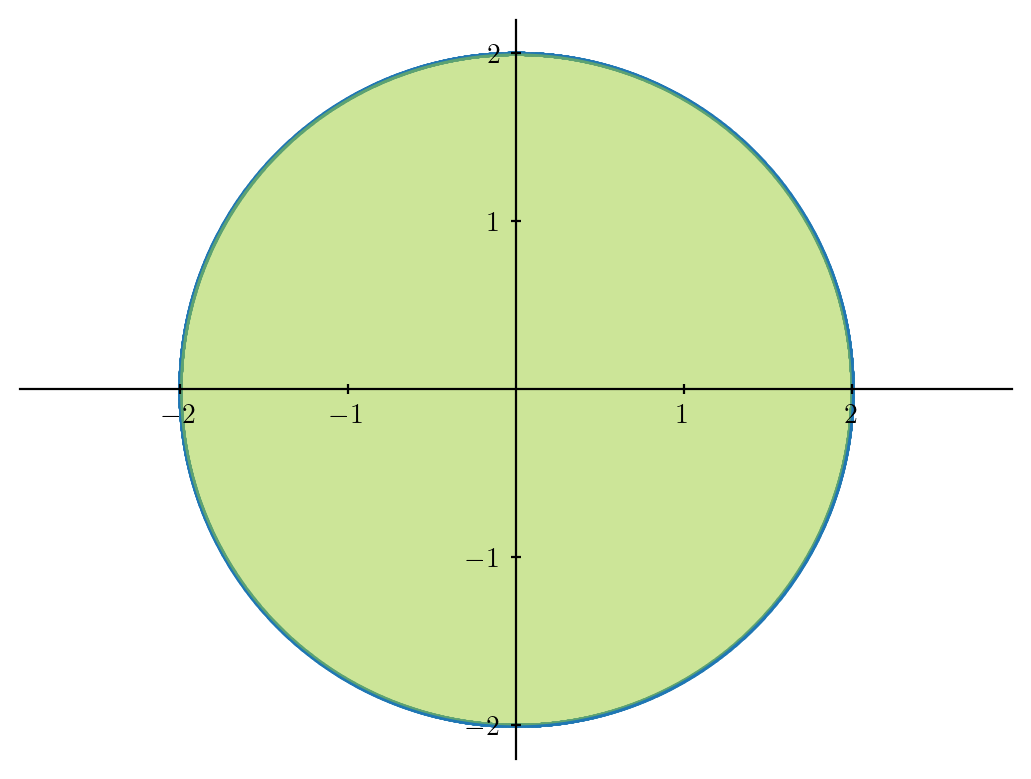

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x, y, marker='.', s=0.5)
ax.axis('equal')
#Move axis to the center
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
#No up x-axis and right y-axis
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.set_xticks([-2,-1,1,2])
ax.set_yticks([-2,-1,1,2])
plt.fill(x, y, 'yellowgreen', alpha=0.5)
ax.tick_params(direction='inout')

Generalize your circle drawing commands to produce a function, 
```
draw_circle(x0, y0, R, color)
```
that draws the circle.  Here, `(x0, y0)` is the center of the circle, `R` is the radius, and `color` is the color of the circle.  

Now randomly draw 10 circles at different locations, with random radii, and random colors on the same plot.

In [42]:
def draw_circle(ax, x0, y0, R, edgecolor='k', facecolor='C0'):
    theta = np.linspace(0, 2*np.pi, 10000)
    x = x0 + R*np.cos(theta)
    y = y0 + R*np.sin(theta)

    ax.scatter(x, y, marker='.', s=0.1, c=edgecolor)
    ax.fill(x, y, facecolor, alpha=0.5)

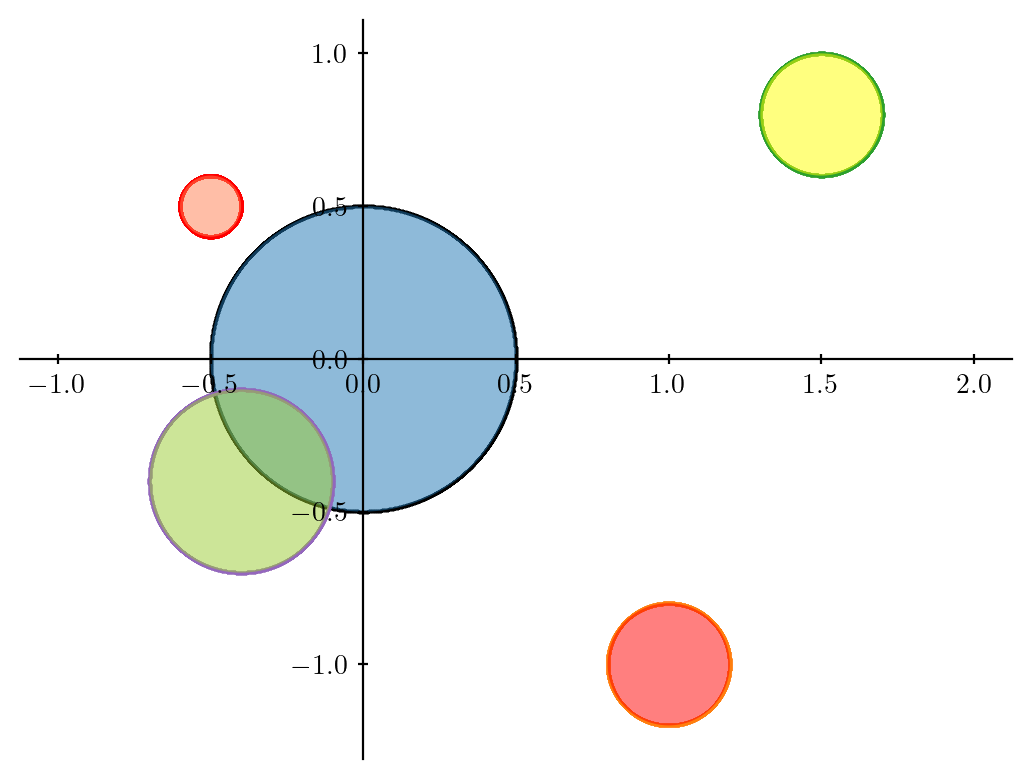

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axis('equal')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

draw_circle(ax, 0, 0, 0.5)
draw_circle(ax, 1, -1, 0.2, 'C1', 'r')
draw_circle(ax, 1.5, 0.8, 0.2, 'C2', 'yellow')
draw_circle(ax, -0.5, 0.5, 0.1, 'r', 'coral')
draw_circle(ax, -0.4, -0.4, 0.3, 'C4', 'yellowgreen')

ax.relim()
ax.autoscale_view()
ax.tick_params(direction='inout')
plt.show()

## Q4: Climate

Download the data file of global surface air temperature averages from here:
https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt
This data comes from: https://data.giss.nasa.gov/gistemp/graphs/

(Don't ask, of course you can download data straight from python! The library is called `urllib`)

There are 3 columns here: the year, the temperature change, and a smoothed representation of the temperature change.  

  * Read in this data using `np.loadtxt()`.  
  * Plot as a line the smoothed representation of the temperature changes.  
  * Plot as points the temperature change (no smoothing).  Color the points blue if they are < 0 and color them red if they are >= 0
  
You might find the numpy `where()` function useful.

In [7]:
wget.download('https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt')

100% [................................................................................] 3664 / 3664

'data.txt'

In [26]:
data = np.loadtxt('nasa-giss.txt')

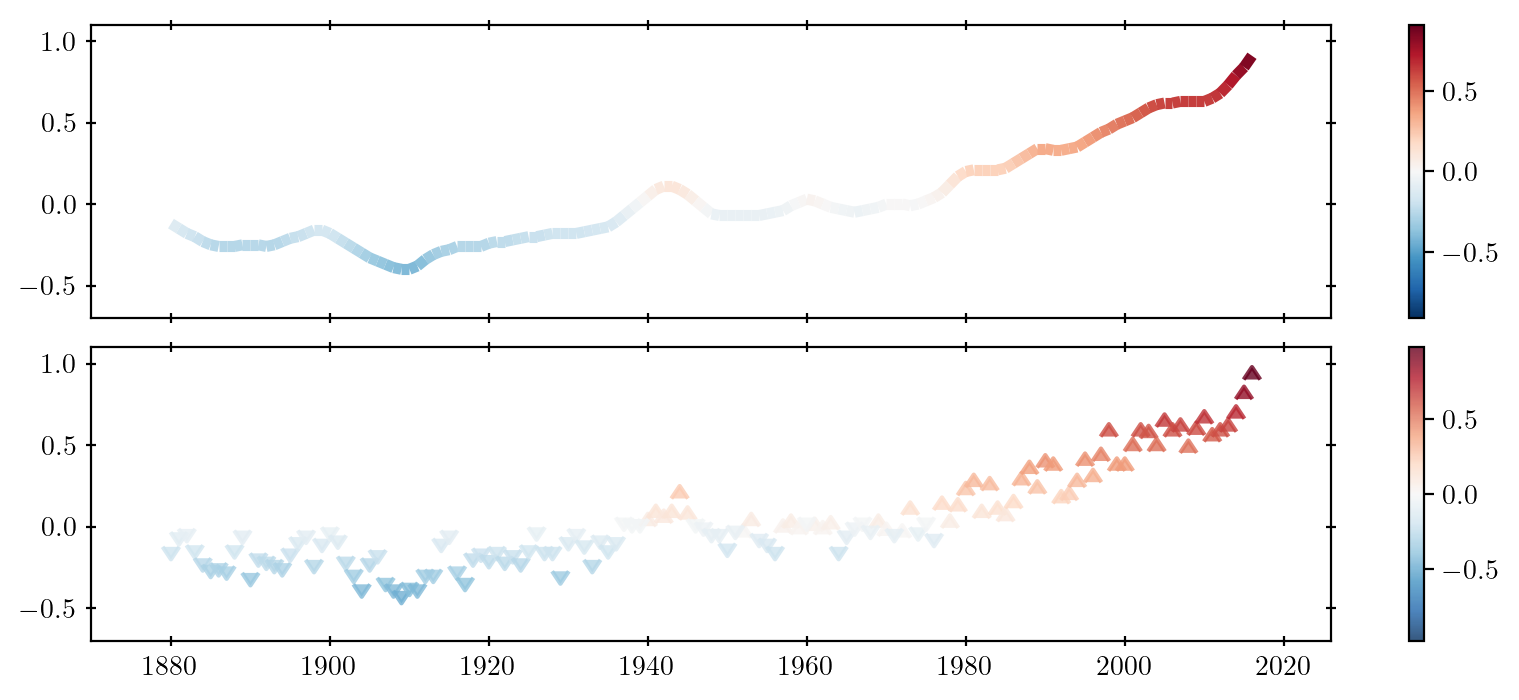

In [44]:
fig = plt.figure(figsize=(10,4))
axs = fig.subplots(2,1,sharex=True)
plt.subplots_adjust(hspace=0.1)
norm = TwoSlopeNorm(0, -np.abs(data[:,2]).max(), np.abs(data[:,2]).max())
verts = np.array([data[:,0], data[:,2]]).T.reshape(-1, 1, 2)
lines = np.concatenate([verts[:-1], verts[1:]], axis=1)
line = LineCollection(lines, cmap='RdBu_r', norm=norm)
line.set_array(data[:,2])
line = axs[0].add_collection(line)
line.set_linewidth(4)
fig.colorbar(line, ax=axs[0])
axs[0].set_xlim(data[:,0].min()-10, data[:,0].max()+10)
axs[0].set_ylim(-0.7, 1.1)
axs[0].tick_params(axis='both', which='both', top=True, right=True, direction='inout')

norm = TwoSlopeNorm(0, -np.abs(data[:,1]).max(), np.abs(data[:,1]).max())
axs[1].scatter(data[data[:,1]>0,0], data[data[:,1]>0,1], marker=6, c=data[data[:,1]>0,1], alpha=0.8, norm=norm, cmap='RdBu_r')
points = axs[1].scatter(data[data[:,1]<0,0], data[data[:,1]<0,1], marker=7, c=data[data[:,1]<0,1], alpha=0.8, norm=norm, cmap='RdBu_r')
fig.colorbar(points, ax=axs[1])
axs[1].set_xlim(data[:,0].min()-10, data[:,0].max()+10)
axs[1].set_ylim(-0.7, 1.1)
axs[1].tick_params(axis='both', which='both', top=True, right=True, direction='inout')

## Q5: Subplots

Matplotlib has a number of ways to create multiple axes in a figure -- look at `plt.subplots()` (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)

Create an `x` array using NumPy with a number of points, spanning from $[0, 2\pi]$.  

Create 3 axes vertically, and do the following:

* Define a new numpy array `f` initialized to a function of your choice.
* Plot f in the top axes
* Compute a numerical derivative of `f`,
   $$ f' = \frac{f_{i+1} - f_i}{\Delta x}$$
  and plot this in the middle axes
* Do this again, this time on $f'$ to compute the second derivative and plot that in the bottom axes


In [46]:
f = lambda x : 2*x*np.exp(-2*x)*np.sin(10*x)

dx = 20/1000
x = np.arange(0, 2*np.pi, dx)
y = f(x)
ydot = (y[1:]-y[:-1])/dx
ydotdot = (ydot[1:]-ydot[:-1])/dx

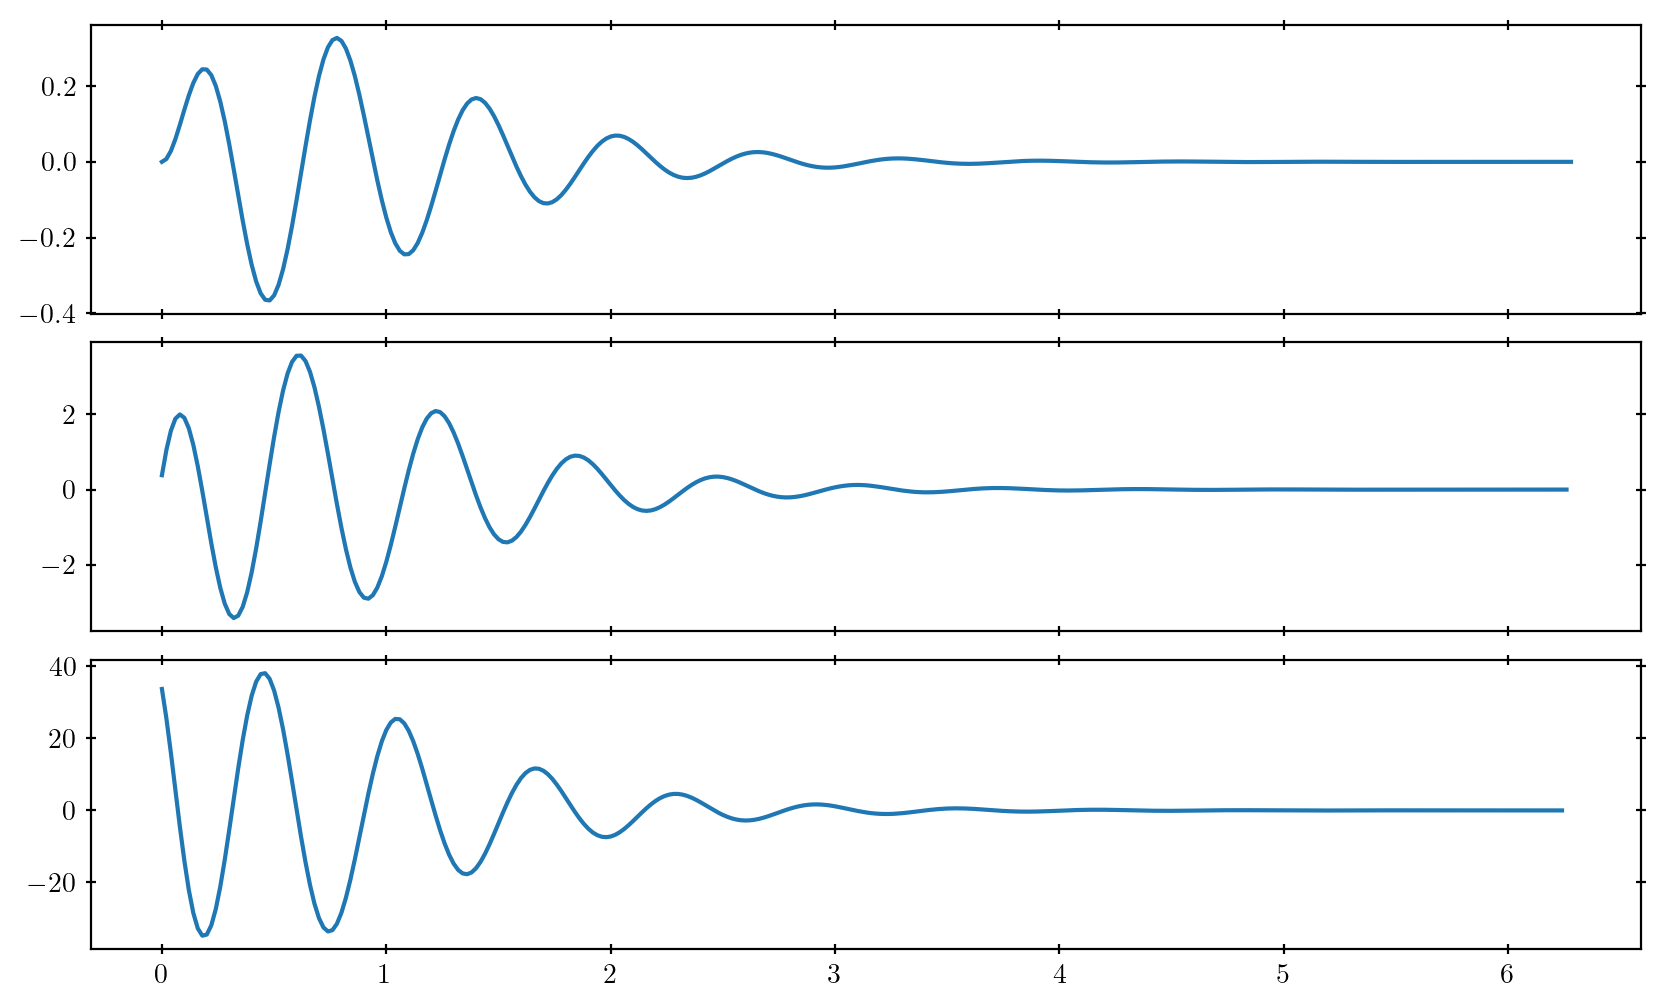

In [47]:
fig = plt.figure(figsize=(10, 6))
axs = fig.subplots(3,1,sharex=True)
plt.subplots_adjust(hspace=0.1)

for i,func in enumerate([y,ydot,ydotdot]):
    axs[i].plot(x[:x.shape[0]-i], func)
    axs[i].tick_params(axis='both', which='both', top=True, right=True, direction='inout')

## Q6: frequent words plotting

In this exercise, we will read the file with the transcription of _Star Trek TOS, Shore Leave_ and calculate the amount of time each word was found. We will then plot the 25 most frequent words and label the plot.

#### Read the file and create the dictionaty {'word':count}

   * Open the `shore_leave.txt`
   * Create the dictionary of the form {'word':count}, where `count` shows the amount of times the word was found in the text. Remember to get rid of the punctuation ("." and ",") and to ensure that all words are lowercase

In [28]:
f = open("shore_leave.txt", "r")
text = [word.strip('.,!?:;').lower() for word in f.read().split()]
unique = set(text)
words = {s:text.count(s) for s in unique}
sorted_words = [s for s,n in sorted(words.items(), key = lambda x : x[1], reverse=True)]

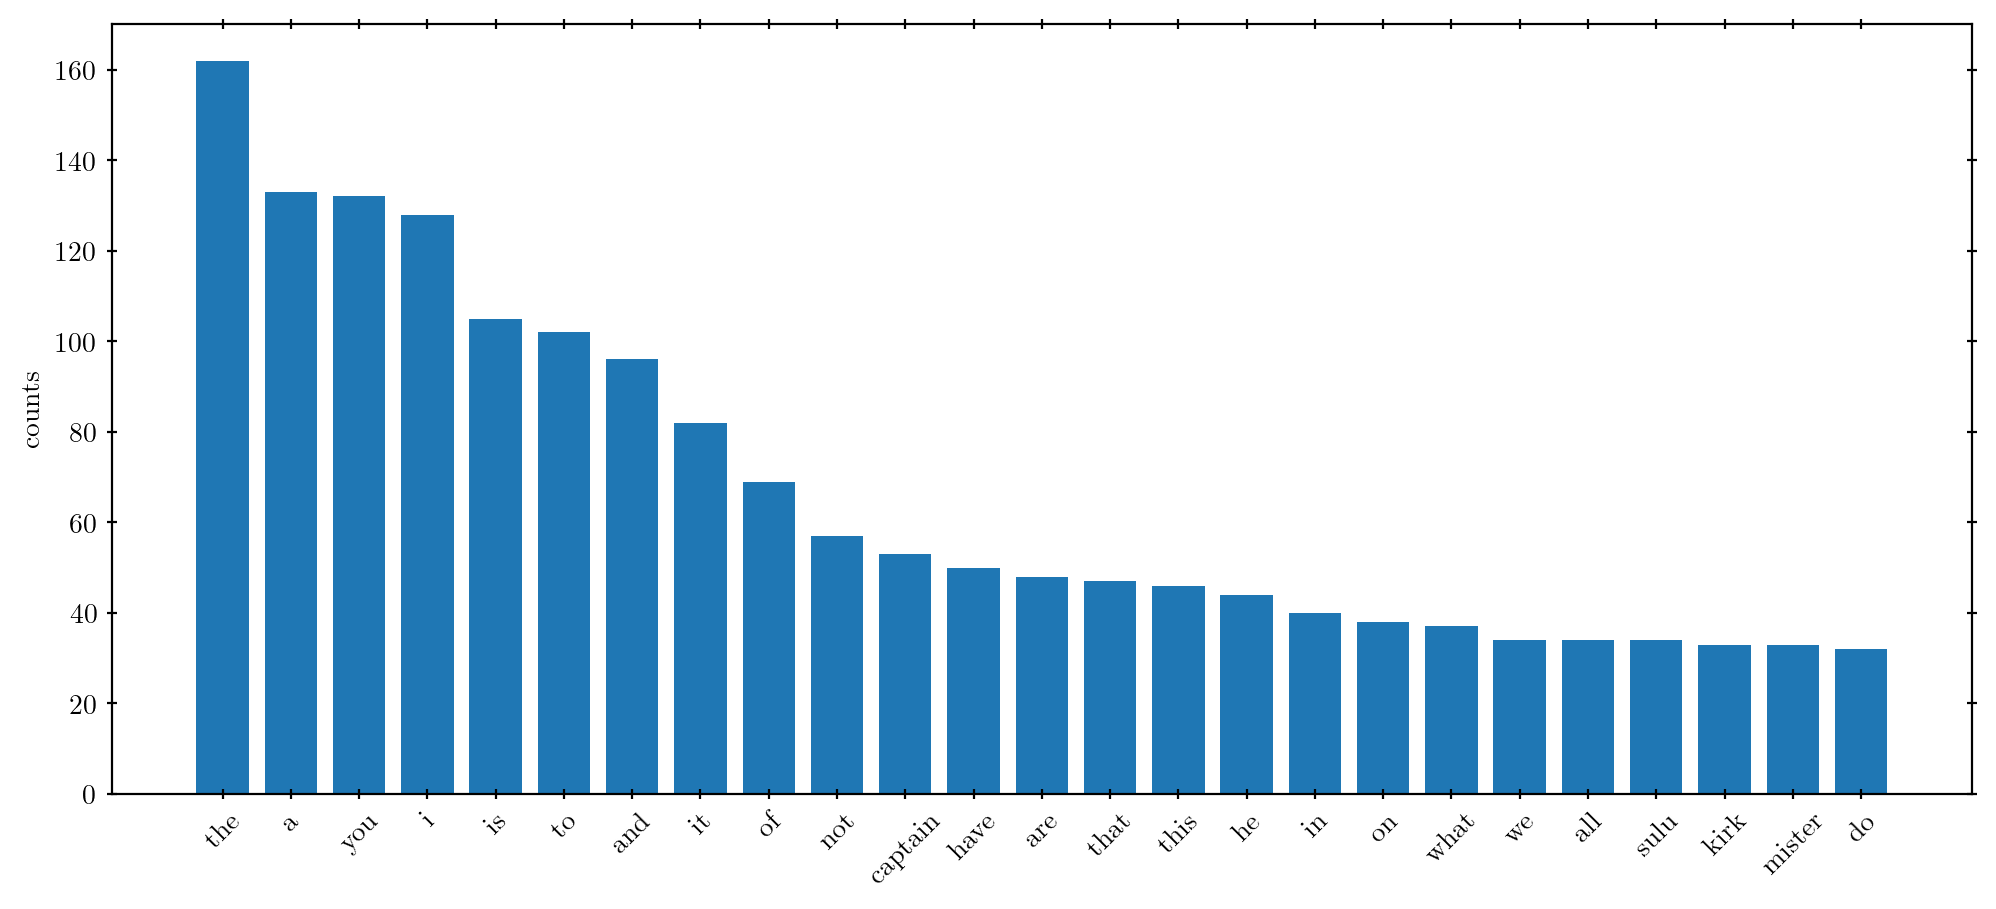

In [48]:
import numpy as np 
import matplotlib.pyplot as plt
num_words = 25

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

ax.bar(np.linspace(1,num_words+1, num_words), [words[x] for x in sorted_words[:num_words]])
ax.set_xticks(np.linspace(1,num_words+1, num_words), [x for x in sorted_words[:num_words]], rotation=45)
ax.set_ylabel('counts')
ax.tick_params(axis='both', which='both', top=True, right=True, direction='inout')

## Q7: Mandelbrot set

The [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set) is defined such that $z_{k+1} = z_k^2 + c$
remains bounded, which is usually taken as $|z_{k+1}| <= 2$
where $c$ is a complex number and we start with $z_0 = 0$

We want to consider a range of $c$, as complex numbers $c = x + iy$,
where $-2 < x < 2$ and $-2 < y < 2$.

For each $c$, identify its position on a Cartesian grid as $(x,y)$ and 
assign a value $N$ that is the number of iterations, $k$, required for $|z_{k+1}|$ to become greater than $2$.

The plot of this function is called the Mandelbrot set.

Here's a simple implementation that just does a fixed number of iterations and then colors points in Z depending on whether they satisfy $|z| \le 2$.  

Your task is to extend this to record the number of iterations it takes for each point in the Z-plane to violate that constraint,
and then plot that data -- it will show more structure


In [8]:
N = 8192
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)

xv, yv = np.meshgrid(x, y)

In [9]:
del((x,y))

In [10]:
c = xv + 1j*yv

z = np.zeros((N, N), dtype=np.complex128)

for i in range(100):
    z = z**2 + c
    
m = np.ones((N, N))
m[np.abs(z) <= 2] = 0.0

/var/folders/zk/yz_63bvd4ss1lbqszrdsg4qm0000gn/T/ipykernel_1299/1371593116.py:6: RuntimeWarning: overflow encountered in square
  z = z**2 + c
/var/folders/zk/yz_63bvd4ss1lbqszrdsg4qm0000gn/T/ipykernel_1299/1371593116.py:6: RuntimeWarning: invalid value encountered in square
  z = z**2 + c


In [11]:
del((xv,yv,c,z))

(<matplotlib.patches.Rectangle at 0x1270917d0>,
 (<matplotlib.patches.ConnectionPatch at 0x1267ce150>,
  <matplotlib.patches.ConnectionPatch at 0x126ffd510>))

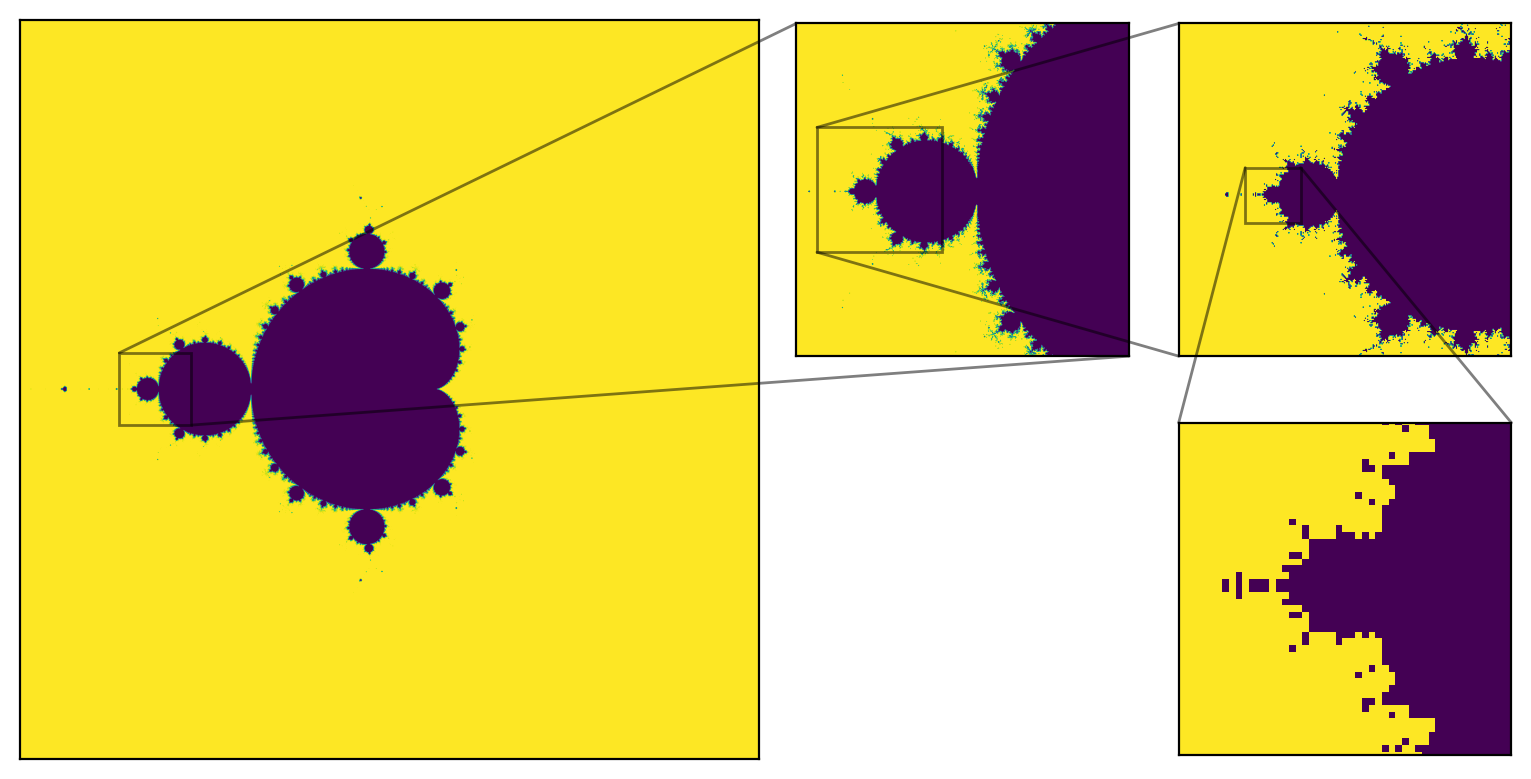

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, xticklabels=[], yticklabels=[])
ax.imshow(m, origin='lower')
ax.tick_params(left=False, bottom=False)

x1, x2, y1, y2 = 1100, 1900, 3700, 4500
ax1 = ax.inset_axes([1.05,0.52,0.45,0.5], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
ax1.imshow(m, origin="lower")
ax1.tick_params(left=False, bottom=False)
ax.indicate_inset_zoom(ax1, edgecolor="black")

x1, x2, y1, y2 = 1150, 1450, 3950, 4250
ax2 = ax1.inset_axes([1.1,0.,1.1,1], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
ax2.imshow(m, origin="lower")
ax2.tick_params(left=False, bottom=False)
ax1.indicate_inset_zoom(ax2, edgecolor="black")

x1, x2, y1, y2 = 1210, 1260, 4070, 4120
ax3 = ax2.inset_axes([-0.05,-1.2,1.1,1], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
ax3.imshow(m, origin="lower")
ax3.tick_params(left=False, bottom=False)
ax2.indicate_inset_zoom(ax3, edgecolor="black")